In [2]:
from pylab import *

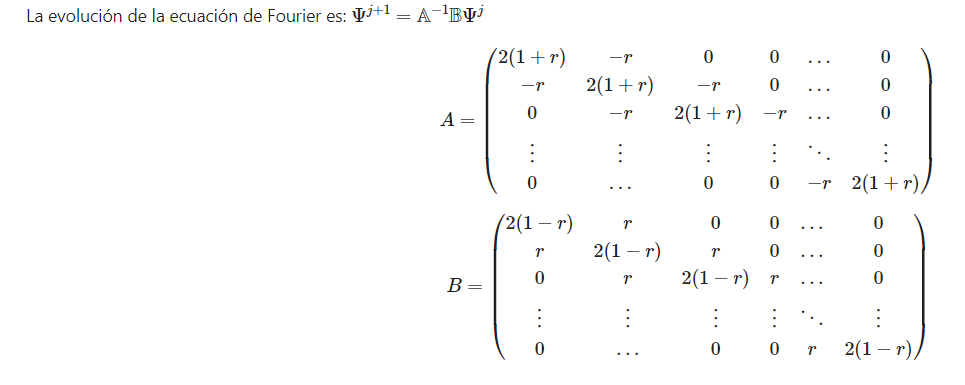

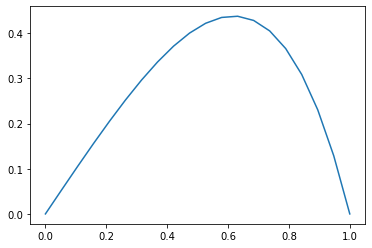

In [3]:
x = linspace(0,1,20)
psi_ini = x*(1-x)*exp(x)
plot(x,psi_ini)
show()

In [4]:
def Mat_AiB(dim,r):
    # dim no considera los puntos a la frontera
    A , B = zeros((dim,dim)) , zeros((dim,dim))
    # diagonales centrales
    for i in range(dim):
        A[i,i] = 2*(1+r)
        B[i,i] = 2*(1-r)
    # diagonales superior e inferior
    for i in range(dim-1):
        A[i,i+1] = -r
        A[i+1,i] = -r
        B[i,i+1] = r
        B[i+1,i] = r
    Ai = inv(A)
    return dot(Ai,B)

In [5]:
Mat_AiB(5,1)

array([[0.07179487, 0.28717949, 0.07692308, 0.02051282, 0.00512821],
       [0.28717949, 0.14871795, 0.30769231, 0.08205128, 0.02051282],
       [0.07692308, 0.30769231, 0.15384615, 0.30769231, 0.07692308],
       [0.02051282, 0.08205128, 0.30769231, 0.14871795, 0.28717949],
       [0.00512821, 0.02051282, 0.07692308, 0.28717949, 0.07179487]])

In [6]:
def CR(psi_ini,x,t,D):
    dx , dt = x[1]-x[0] , t[1]-t[0]
    r = (D*dt)/(dx**2)
    print('r=',r)
    E = Mat_AiB(len(x)-2,r)
    psi_in = psi_ini[1:-1]
    for i in range(len(t)):
        psi_in = dot(E,psi_in)
    psi_ini[1:-1] = psi_in
    return psi_ini

In [7]:
def CR(psi_ini,x,t,D):
    dx , dt = x[1]-x[0] , t[1]-t[0]
    r = (D*dt)/(dx**2)
    print('r=',r)
    E = Mat_AiB(len(x)-2,r)
    psi_in = psi_ini[1:-1]
    for i in range(len(t)):
        psi_in = dot(E,psi_in)
    psi_ini[1:-1] = psi_in
    return psi_ini

r= 0.8494949494949497


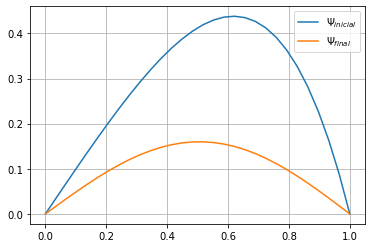

In [9]:
t = linspace(0,1,100)
x = linspace(0,1,30)
psi_inicial = x*(1-x)*exp(x)
plot(x,psi_inicial,label=r'$\Psi_{inicial}$')
psi_final = CR(psi_inicial,x,t,0.1)

plot(x,psi_final,label=r'$\Psi_{final}$')
legend(),grid()
show()

r= 0.40001010101010104


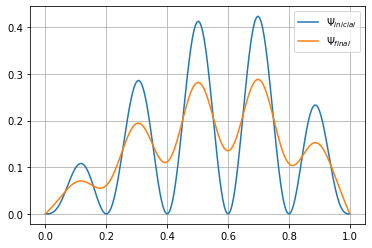

In [8]:
t = linspace(0,0.01,100)
x = linspace(0,1,200)
psi_inicial = x*(1-x)*exp(x)*sin(5*pi*x)**2
plot(x,psi_inicial,label=r'$\Psi_{inicial}$')
psi_final = CR(psi_inicial,x,t,0.1)

plot(x,psi_final,label=r'$\Psi_{final}$')
legend(),grid()
show()